# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from citipy import citipy

from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats,lngs)
#city
cities=[]
for lat_lang in lat_lngs:
    city = citipy.nearest_city(lat_lang[0],lat_lang[1]).city_name
    if city not in cities:
        cities.append(city)
    
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#decided not to use the dictionary and creating 9 empty lists and appending to the dict. 
#I read a values from api call into a list and saved it into csv file.
#weather_dict = dict()
data=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i=0
headers=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        data.append([response['name'],response['coord']['lat'],response['coord']['lon'],response['main']['temp_max'],
                   response['main']['humidity'],response['clouds']['all'],response['wind']['speed'],
                   response['sys']['country'],response['dt']])
#I assumed when you city id it was id number I found in response
        print(f' Processing weather for {city} and the number {response["id"]}:{i}-{response["name"]}')
        i+=1
        if i%50 == 0:
            time.sleep(40)          
    except:
        print('No data for city {city}')  

 Processing weather for whyalla and the number 2058430:0-Whyalla
 Processing weather for poum and the number 2138555:1-Poum
 Processing weather for provideniya and the number 4031574:2-Provideniya
 Processing weather for baruun-urt and the number 2032614:3-Baruun-Urt
 Processing weather for skjervoy and the number 777682:4-Skjervøy
 Processing weather for kaitangata and the number 2208248:5-Kaitangata
 Processing weather for boende and the number 218680:6-Boende
 Processing weather for farah and the number 1142263:7-Farah
 Processing weather for nemuro and the number 2128975:8-Nemuro
 Processing weather for busselton and the number 2075265:9-Busselton
 Processing weather for saskylakh and the number 2017155:10-Saskylakh
 Processing weather for okhotsk and the number 2122605:11-Okhotsk
 Processing weather for urumqi and the number 1529102:12-Ürümqi
 Processing weather for punta arenas and the number 3874787:13-Punta Arenas
 Processing weather for yar-sale and the number 1486321:14-Yar-S

 Processing weather for broken hill and the number 2173911:114-Broken Hill
 Processing weather for yulara and the number 6355222:115-Yulara
 Processing weather for avarua and the number 4035715:116-Avarua
 Processing weather for vanavara and the number 2013727:117-Vanavara
 Processing weather for kupang and the number 2057087:118-Kupang
No data for city {city}
 Processing weather for mount isa and the number 2065594:119-Mount Isa
 Processing weather for lasa and the number 3175096:120-Laas
 Processing weather for abu samrah and the number 172515:121-Abu Samrah
 Processing weather for tias and the number 2510485:122-Tías
 Processing weather for vila and the number 7117100:123-Vila
No data for city {city}
 Processing weather for olafsvik and the number 3414079:124-Olafsvik
 Processing weather for hilo and the number 5855927:125-Hilo
No data for city {city}
 Processing weather for seoul and the number 1835848:126-Seoul
 Processing weather for shache and the number 1280037:127-Shache
 Proc

 Processing weather for buckeye and the number 5287262:228-Buckeye
 Processing weather for san patricio and the number 4726521:229-San Patricio
 Processing weather for carutapera and the number 3402648:230-Carutapera
 Processing weather for graciano sanchez and the number 3527413:231-Graciano Sánchez
No data for city {city}
No data for city {city}
No data for city {city}
No data for city {city}
 Processing weather for muisne and the number 3653967:232-Muisne
 Processing weather for porto novo and the number 2392087:233-Porto-Novo
No data for city {city}
 Processing weather for martil and the number 2542987:234-Martil
 Processing weather for vestmanna and the number 2610343:235-Vestmanna
 Processing weather for neuquen and the number 3843123:236-Neuquén
 Processing weather for abha and the number 110690:237-Abhā
 Processing weather for marsa matruh and the number 352733:238-Marsá Maţrūḩ
 Processing weather for coquimbo and the number 3893629:239-Coquimbo
 Processing weather for santa ma

 Processing weather for haines junction and the number 5969025:342-Haines Junction
 Processing weather for chadiza and the number 921028:343-Chadiza
 Processing weather for itumbiara and the number 3460522:344-Itumbiara
No data for city {city}
 Processing weather for mweka and the number 207596:345-Mweka
 Processing weather for yuksekova and the number 296173:346-Yüksekova
 Processing weather for sur and the number 286245:347-Sur
 Processing weather for cabo san lucas and the number 3985710:348-Cabo San Lucas
 Processing weather for kununurra and the number 2068110:349-Kununurra
 Processing weather for listvyanskiy and the number 1500468:350-Listvyanskiy
 Processing weather for bambous virieux and the number 1106677:351-Bambous Virieux
 Processing weather for gusevskiy and the number 557842:352-Gusevskiy
 Processing weather for opuwo and the number 3354077:353-Opuwo
 Processing weather for taltal and the number 3870243:354-Taltal
 Processing weather for saint-pierre and the number 9352

 Processing weather for nantucket and the number 4944903:459-Nantucket
 Processing weather for sapouy and the number 2355869:460-Sapouy
 Processing weather for ketchikan and the number 5554428:461-Ketchikan
 Processing weather for ancud and the number 3899695:462-Ancud
 Processing weather for hualmay and the number 3939761:463-Hualmay
 Processing weather for ojinaga and the number 3994469:464-Ojinaga
 Processing weather for pinsk and the number 623549:465-Pinsk
 Processing weather for pontian kecil and the number 1732711:466-Pontian Kecil
 Processing weather for mogadishu and the number 53654:467-Mogadishu
 Processing weather for brantford and the number 5907990:468-Brantford
No data for city {city}
No data for city {city}
 Processing weather for eagle pass and the number 5520677:469-Eagle Pass
 Processing weather for porto nacional and the number 3452711:470-Porto Nacional
 Processing weather for barcelos and the number 2742416:471-Barcelos
 Processing weather for kitakata and the num

 Processing weather for micheweni and the number 153955:573-Micheweni
 Processing weather for mattawa and the number 5802636:574-Mattawa
 Processing weather for kichera and the number 2022129:575-Kichera
No data for city {city}
 Processing weather for warwick and the number 5225507:576-Warwick
 Processing weather for beauceville and the number 6295855:577-Beauceville
 Processing weather for ylivieska and the number 630768:578-Ylivieska


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weather_data = pd.DataFrame(data,columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Whyalla,-33.03,137.58,62.60,72,90,14.99,AU,1604112806
1,Poum,-20.23,164.02,79.02,76,99,19.89,NC,1604112806
2,Provideniya,64.38,-173.30,21.97,84,20,7.25,RU,1604112806
3,Baruun-Urt,46.68,113.28,36.99,70,29,19.10,MN,1604112806
4,Skjervøy,70.03,20.97,32.27,87,0,18.54,NO,1604112806


In [37]:
cleaned_weather_data = weather_data.dropna(how="any")
cleaned_weather_data.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
cleaned_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.008256,13.325820,56.366390,74.554404,51.338515,7.514111,1.604113e+09
std,33.707604,88.191852,22.081941,19.680275,41.074994,5.773343,2.508875e+02
min,-54.800000,-179.170000,-10.440000,13.000000,0.000000,0.250000,1.604112e+09
25%,-8.850000,-63.320000,41.470000,64.500000,1.000000,3.360000,1.604113e+09
50%,25.800000,17.940000,60.010000,79.000000,56.000000,5.820000,1.604113e+09
75%,49.390000,83.165000,75.200000,90.000000,94.000000,10.290000,1.604113e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,56.370000,1.604113e+09


In [39]:
#Save cleaned data
cleaned_weather_data.to_csv(output_data_file)

In [40]:
#  Get the indices of cities that have humidity over 100%.
greater_than_100_humidity_idx = cleaned_weather_data.loc[cleaned_weather_data['Humidity'] > 100].index
greater_than_100_humidity_idx

Int64Index([], dtype='int64')

In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cleaned_weather_data.drop(greater_than_100_humidity_idx)
clean_city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Whyalla,-33.03,137.58,62.60,72,90,14.99,AU,1604112806
1,Poum,-20.23,164.02,79.02,76,99,19.89,NC,1604112806
2,Provideniya,64.38,-173.30,21.97,84,20,7.25,RU,1604112806
3,Baruun-Urt,46.68,113.28,36.99,70,29,19.10,MN,1604112806
4,Skjervøy,70.03,20.97,32.27,87,0,18.54,NO,1604112806
5,Kaitangata,-46.28,169.85,57.00,84,100,14.00,NZ,1604112338
6,Boende,-0.22,20.87,67.41,96,70,1.19,CD,1604112807
7,Farah,32.50,62.50,45.81,42,0,2.51,AF,1604112807
8,Nemuro,43.32,145.57,51.80,50,20,12.75,JP,1604112807
9,Busselton,-33.65,115.33,69.21,66,100,9.51,AU,1604112351


In [42]:
date_index = clean_city_data.head(10).index.values[0]
run_date = clean_city_data.at[date_index,'Date']
date_of_analysis = datetime.datetime.fromtimestamp(int(run_date)).strftime('%Y-%m-%d')
date_of_analysis

'2020-10-30'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

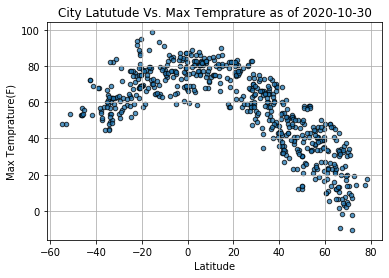

In [43]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Max Temp',marker="o", facecolors="red", edgecolors="black",alpha=0.75)

ax.set_ylabel('Max Temprature(F)')
ax.set_xlabel('Latitude')
label = 'City Latutude Vs. Max Temprature as of ' + date_of_analysis
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/LatvsTemp')

## Latitude vs. Humidity Plot

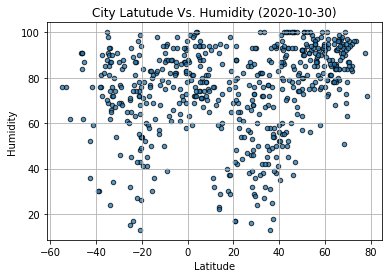

In [44]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Humidity',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Humidity ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvshumidity.png')

## Latitude vs. Cloudiness Plot

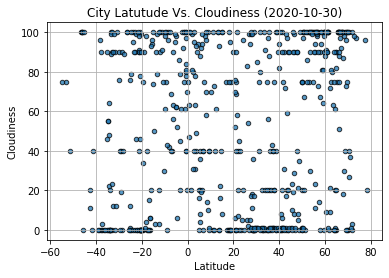

In [45]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Cloudiness',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Cloudiness ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvscloudiness.png')

## Latitude vs. Wind Speed Plot

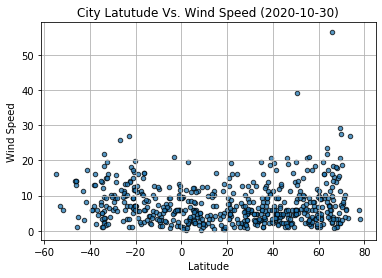

In [46]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Wind Speed',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
label = f'City Latutude Vs. Wind Speed ({date_of_analysis})'
ax.set_title(label)
ax.grid()
fig = ax.get_figure()
fig.savefig('../output_data/latvswindspeed.png')

## Linear Regression

In [47]:
northern_hemi = clean_city_data.loc[clean_city_data.Lat > 0]
northern_hemi.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,Provideniya,64.38,-173.30,21.97,84,20,7.25,RU,1604112806
1,3,Baruun-Urt,46.68,113.28,36.99,70,29,19.10,MN,1604112806
2,4,Skjervøy,70.03,20.97,32.27,87,0,18.54,NO,1604112806
3,7,Farah,32.50,62.50,45.81,42,0,2.51,AF,1604112807
4,8,Nemuro,43.32,145.57,51.80,50,20,12.75,JP,1604112807
...,...,...,...,...,...,...,...,...,...,...
390,574,Mattawa,46.74,-119.90,50.00,43,1,5.82,US,1604113311
391,575,Kichera,55.94,110.10,24.49,87,100,3.13,RU,1604113311
392,576,Warwick,41.70,-71.42,32.00,92,1,4.70,US,1604113311
393,577,Beauceville,46.22,-70.78,23.00,85,19,1.34,CA,1604113311


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

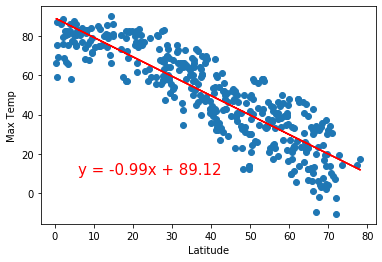

The r-value is: -0.8748751606070196


In [48]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

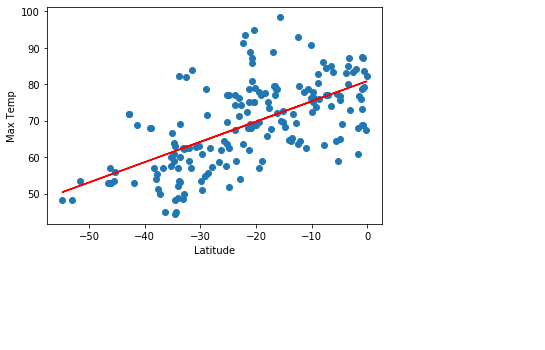

The r-value is: 0.6217961468337466


In [49]:
southern_hemi = clean_city_data.loc[clean_city_data.Lat < 0]
southern_hemi.reset_index()
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

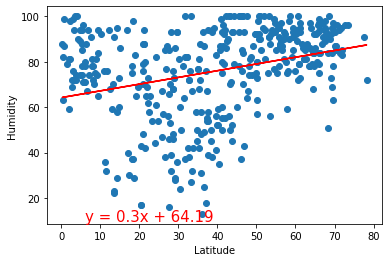

The r-value is: 0.30499682769874337


In [50]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

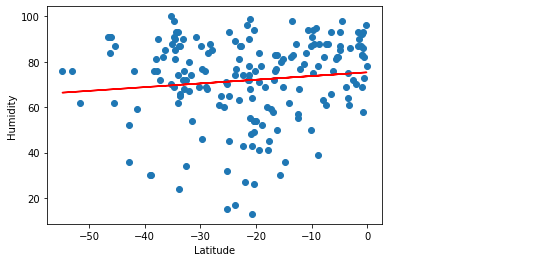

The r-value is: 0.11366797588226049


In [51]:
southern_hemi = clean_city_data.loc[clean_city_data.Lat < 0]
southern_hemi.reset_index()
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

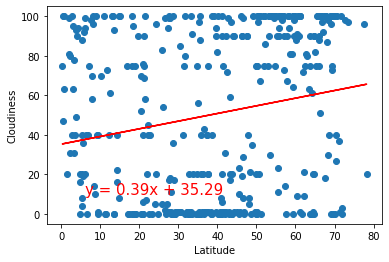

The r-value is: 0.19312858821232376


In [52]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

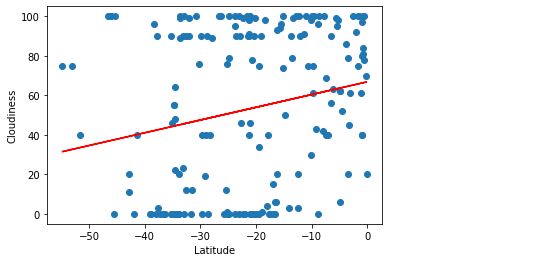

The r-value is: 0.2074462859214056


In [53]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

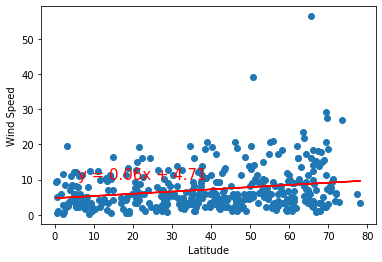

The r-value is: 0.214827269783239


In [54]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

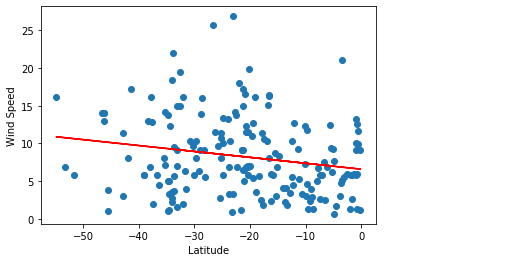

The r-value is: -0.19804985058723773


In [55]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is: {rvalue}')